To find the MSRP (Manufacturer’s Suggested Retail Price) of cars based on various factors like Type,Origin,DriveTrain,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,and Length using Multiple Linear Regression Model.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from numpy import mean
from numpy import absolute
from numpy import sqrt

In [2]:
# Read the data
car = pd.read_csv("Car_Details_original.csv")
car

,Make,Type,Origin,DriveTrain,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,MSRP
0,Acura,SUV,Asia,All,3.5,6.0,265,17,23,4451,106,189,36945
1,Acura,Sedan,Asia,Front,2.0,4.0,200,24,31,2778,101,172,23820
2,Acura,Sedan,Asia,Front,2.4,4.0,200,22,29,3230,105,183,26990
3,Acura,Sedan,Asia,Front,3.2,6.0,270,20,28,3575,108,186,33195
4,Acura,Sedan,Asia,Front,3.5,6.0,225,18,24,3880,115,197,43755
...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,Volvo,Sedan,Europe,Front,2.4,5.0,197,21,28,3450,105,186,40565
424,Volvo,Sedan,Europe,Front,2.3,5.0,242,20,26,3450,105,186,42565
425,Volvo,Sedan,Europe,Front,2.9,6.0,268,19,26,3653,110,190,45210
426,Volvo,Wagon,Europe,Front,1.9,4.0,170,22,29,2822,101,180,26135


**Identifying and cleaning the NULL values**

In [3]:
#detecting missing values
car[car.isnull().any(axis=1)]

,Make,Type,Origin,DriveTrain,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,MSRP
247,Mazda,Sports,Asia,Rear,1.3,NaN,197,18,25,3053,106,174,25700
248,Mazda,Sports,Asia,Rear,1.3,NaN,238,18,24,3029,106,174,27200


In [4]:
#Getting the count of attributes in the Cylinders coloumn
car["Cylinders"].value_counts()

6.0     190
4.0     136
8.0      87
5.0       7
12.0      3
10.0      2
3.0       1
Name: Cylinders, dtype: int64

Since that 6.0 is the most common value, will fill in NaN with 6.0:

In [5]:
#Replacing null values with common value
car["Cylinders"].fillna(6.0, inplace=True)

In [6]:
#Checking the replaced values
car["Cylinders"].value_counts()

6.0     192
4.0     136
8.0      87
5.0       7
12.0      3
10.0      2
3.0       1
Name: Cylinders, dtype: int64

**Detecting Outliers using Box Plot**

In [7]:
car.describe()

,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,MSRP
count,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,3.196729,5.808411,215.885514,20.060748,26.843458,3577.953271,108.154206,186.362150,32774.855140
std,1.108595,1.554844,71.836032,5.238218,5.741201,758.983215,8.311813,14.357991,19431.716674
min,1.300000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000,10280.000000
25%,2.375000,4.000000,165.000000,17.000000,24.000000,3104.000000,103.000000,178.000000,20334.250000
50%,3.000000,6.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,187.000000,27635.000000
75%,3.900000,6.000000,255.000000,21.250000,29.000000,3977.750000,112.000000,194.000000,39205.000000
max,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,238.000000,192465.000000


We can see that the column MSRP is having Outliers since there maximum value has great variation from the mean values. So we are going to find the outliers and remove them

<AxesSubplot:>

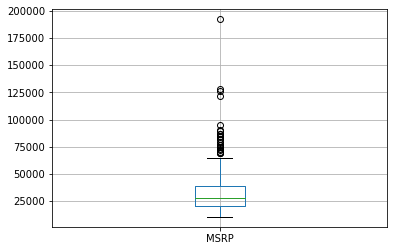

In [8]:
#box plot on column MSRP
car.boxplot(column='MSRP')

In the above plot, we can clearly see that values above 65000 are acting as the outliers

In [9]:
#removing outliers
MSRP_outlier = np.where(car['MSRP']>65000)
car.drop(MSRP_outlier[0], inplace=True)
car.shape

(401, 13)

**Correlations heatmap**

<AxesSubplot:>

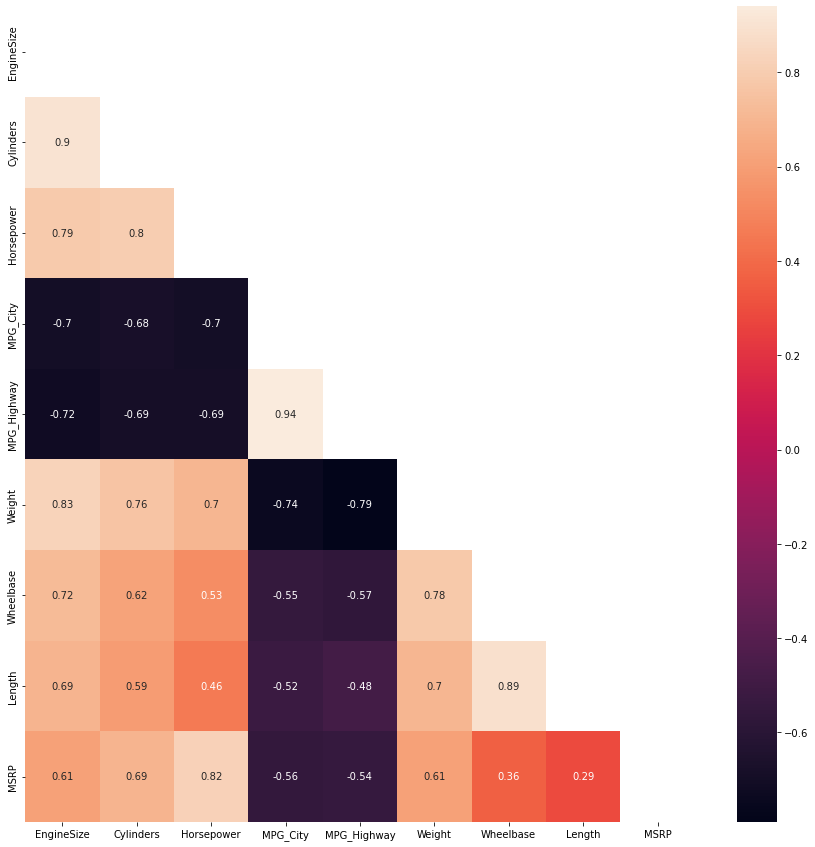

In [10]:
#Find Independent Column Correlations through Heatmap
mask = np.triu(np.ones_like(car.corr(), dtype=bool)) #Creaing a mask to onlyshow the bottom triangle
plt.subplots(figsize=(15,15))
correlation_matrix = car.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, mask=mask)

High correlation between predictor varibales may result in errors in predicion while creating a regression model.


We should remove the highly correlated predictor varbales.

In [11]:
#Find Independent Column Correlations
def correlation(dataset,threshold):
    col_corr= [] # List of correlated columns
    corr_matrix=dataset.corr() #finding correlation between columns
    for i in range (len(corr_matrix.columns)): #Number of columns
        for j in range (i):
            if abs(corr_matrix.iloc[i,j])>threshold: #checking correlation between columns
                colName=(corr_matrix.columns[i], corr_matrix.columns[j]) #getting correlated columns
                col_corr.append(colName) #adding correlated column name
    return col_corr #returning set of column names
col=correlation(car,0.8)
print('Correlated columns @ 0.8:', col)

Correlated columns @ 0.8: [('Cylinders', 'EngineSize'), ('MPG_Highway', 'MPG_City'), ('Weight', 'EngineSize'), ('Length', 'Wheelbase'), ('MSRP', 'Horsepower')]


Here, we can remove the columns that highly correlated to each other since they will perform similarly along the model.
We can remove either Cylinder or EngineSize, MPG_Highway or MPG_City, Length or Wheelbase.
We are not droping horsepower because it is correlated with predicted varibale and not the predictor variable.

In [12]:
car.drop(['EngineSize','MPG_City','Wheelbase'], inplace=True, axis=1)
car

,Make,Type,Origin,DriveTrain,Cylinders,Horsepower,MPG_Highway,Weight,Length,MSRP
0,Acura,SUV,Asia,All,6.0,265,23,4451,189,36945
1,Acura,Sedan,Asia,Front,4.0,200,31,2778,172,23820
2,Acura,Sedan,Asia,Front,4.0,200,29,3230,183,26990
3,Acura,Sedan,Asia,Front,6.0,270,28,3575,186,33195
4,Acura,Sedan,Asia,Front,6.0,225,24,3880,197,43755
...,...,...,...,...,...,...,...,...,...,...
423,Volvo,Sedan,Europe,Front,5.0,197,28,3450,186,40565
424,Volvo,Sedan,Europe,Front,5.0,242,26,3450,186,42565
425,Volvo,Sedan,Europe,Front,6.0,268,26,3653,190,45210
426,Volvo,Wagon,Europe,Front,4.0,170,29,2822,180,26135


**Encoding of Necessary Columns**


**Label Encoding**

In [13]:
#getting count of the entries in column Origin
car["Origin"].value_counts()

Asia      157
USA       145
Europe     99
Name: Origin, dtype: int64

Since Origin is having only three entries, we can perform label encoding on Origin.

In [14]:
#Converting the datatype of Origin from object to category
car["Origin"] = car["Origin"].astype('category')
car.dtypes

Make             object
Type             object
Origin         category
DriveTrain       object
Cylinders       float64
Horsepower        int64
MPG_Highway       int64
Weight            int64
Length            int64
MSRP              int64
dtype: object

In [15]:
#Creating the column with categories of origin
car["Origin-category"] = car["Origin"].cat.codes
car.drop('Origin', inplace=True, axis=1)
car.head()

,Make,Type,DriveTrain,Cylinders,Horsepower,MPG_Highway,Weight,Length,MSRP,Origin-category
0,Acura,SUV,All,6.0,265,23,4451,189,36945,0
1,Acura,Sedan,Front,4.0,200,31,2778,172,23820,0
2,Acura,Sedan,Front,4.0,200,29,3230,183,26990,0
3,Acura,Sedan,Front,6.0,270,28,3575,186,33195,0
4,Acura,Sedan,Front,6.0,225,24,3880,197,43755,0


**One Hot Encoding**


Perfroming One Hot Encoding on the columns- Make, Type, and Drivetrain since they are categorical values

In [16]:
car = pd.get_dummies(car, columns =['Make', 'Type', 'DriveTrain'])
car.head()

,Cylinders,Horsepower,MPG_Highway,Weight,Length,MSRP,Origin-category,Make_Acura,Make_Audi,Make_BMW,...,Make_Volvo,Type_Hybrid,Type_SUV,Type_Sedan,Type_Sports,Type_Truck,Type_Wagon,DriveTrain_All,DriveTrain_Front,DriveTrain_Rear
0,6.0,265,23,4451,189,36945,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
1,4.0,200,31,2778,172,23820,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,4.0,200,29,3230,183,26990,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,6.0,270,28,3575,186,33195,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
4,6.0,225,24,3880,197,43755,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


**Multiple Linear Regression Model**

In [17]:
#Creating the Linear Regression Model
from sklearn.linear_model import LinearRegression

#Defining x and y variable
x = car.drop(['MSRP'],axis=1).to_numpy()
y = car['MSRP'].to_numpy()

#Creating Train and Test Datasets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.2, random_state = 100)

#Scaling the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

In [18]:
#Creating the Model
model = LinearRegression()
model.fit(x_train2, y_train)
prediction = model.predict(x_test2)

#Intercept and Coefficent
print('\nIntercept: {:.2f}'.format(float(model.intercept_)))
coeff_table=pd.DataFrame(np.transpose(model.coef_),car.drop(['MSRP'],axis=1).columns,columns=['Coefficients'])
print(coeff_table)


Intercept: 28929.30
                    Coefficients
Cylinders           1.231664e+03
Horsepower          5.764244e+03
MPG_Highway         1.075741e+03
Weight              3.036916e+03
Length             -9.288082e+01
Origin-category    -5.408656e+15
Make_Acura         -2.544649e+15
Make_Audi          -3.404172e+15
Make_BMW           -3.517891e+15
Make_Buick         -1.621008e+15
Make_Cadillac      -1.287666e+15
Make_Chevrolet     -2.681669e+15
Make_Chrysler      -1.972554e+15
Make_Dodge         -1.891640e+15
Make_Ford          -2.392229e+15
Make_GMC           -1.287666e+15
Make_Honda         -4.521633e+15
Make_Hummer        -5.795065e+14
Make_Hyundai       -3.985064e+15
Make_Infiniti      -2.840499e+15
Make_Isuzu         -1.805024e+15
Make_Jaguar        -1.849100e+15
Make_Jeep          -8.182604e+14
Make_Kia           -3.786656e+15
Make_Land Rover    -1.311642e+15
Make_Lexus         -3.575829e+15
Make_Lincoln       -1.621008e+15
Make_MINI          -9.289282e+14
Make_Mazda         -3.

In [19]:
#5-fold Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, random_state=1, shuffle=True)

scores = cross_val_score(model, x_train2, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
r2_scores = cross_val_score(model, x_train2, y_train, scoring='r2', cv=cv, n_jobs=-1)

#r2
print('\nR2: {:.2f}'.format(mean(r2_scores)))
#RMSE
print('Root Mean Squared Error: {:.2f}'.format(sqrt(mean(absolute(scores)))))


R2: -3868931444240332881920.00
Root Mean Squared Error: 6087385.52


In [20]:
#Evaluation matrices - Adj R2,MAE,and RMSE
print('\nR2: {:.2f}'.format(metrics.r2_score(y_test,prediction)))
adjusted_r_squared = 1-(1-metrics.r2_score(y_test,prediction))*(len(y)-1)/(len(y)-x.shape[1]-1)
print('Adj_R2: {:0.2f}'.format(adjusted_r_squared))
print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, prediction)))  
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y_test, prediction)))  
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, prediction)))) 


R2: 0.82
Adj_R2: 0.79
Mean Absolute Error: 3457.56
Mean Squared Error: 20795532.98
Root Mean Squared Error: 4560.21


**Learning Curve**

(0.0, 1000000000.0)

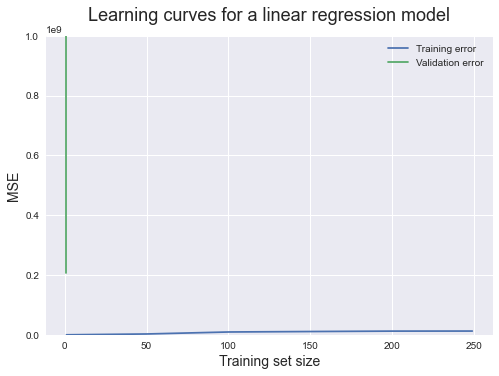

In [29]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, validation_scores = learning_curve(
estimator = model,
X = x_train2,
y = y_train, 
train_sizes = [1,50,100,150,200,249],
cv = 5,
scoring = 'neg_mean_squared_error')

train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)

import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,1000000000)

In general, learning curve is the plot of error against training dataset size.
It helps us to understand whether a model is underfit or overfit.

If the model is underfitted the testing and training error will be both high.

If the model is overfitted there will be large gap between testing and training error. This model is overfitted as obeserved from the above learning curve. 

**Recommendations**

1. After finding the highly correlated dependant varibales, all the varibles showing high correlation shouldn't be dropped. Instead find the Variation Inflation Factor(VIF) and remove the varibles having high VIF

2. Detection and deletion of outliers have high importance. If not done properly it affects the model perfromance.